In [1]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("GPU Devices: ", tf.config.experimental.list_physical_devices('GPU'))

Num GPUs Available:  1
GPU Devices:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


1. **Data Preprocessing**
   - Data loading and preprocessing (e.g., normalization, resizing, augmentation).
   - Create visualizations of some images, and labels.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

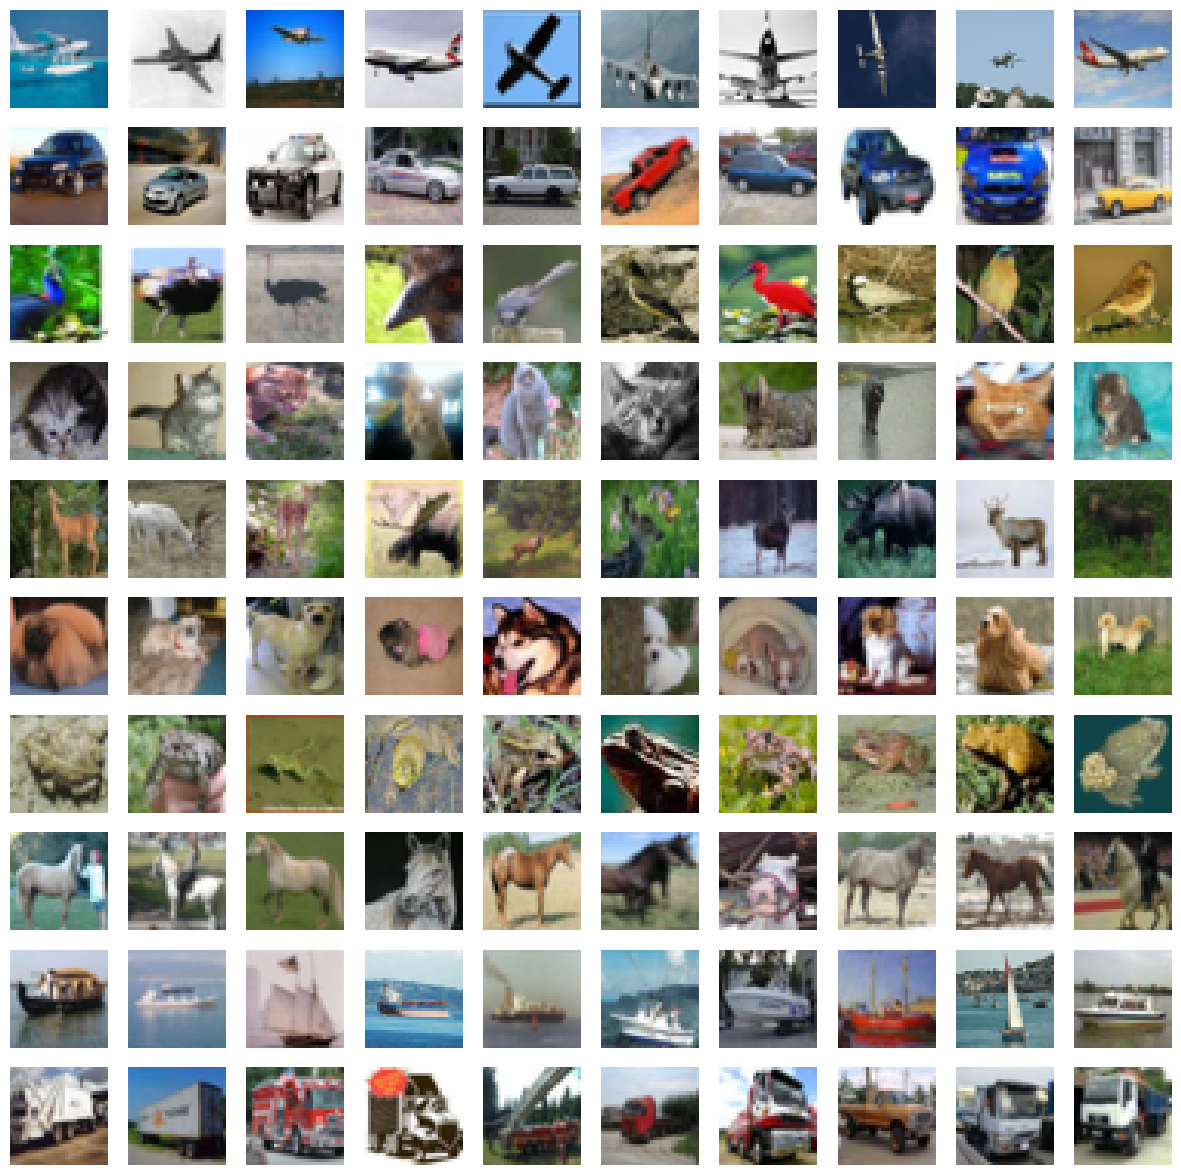

In [3]:
# Your code here :
import matplotlib.pyplot as plt
# Visualize 10 random samples from each class
num_classes = 10
samples_per_class = 10
fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(15, 15))

for i in range(num_classes):
	class_indices = np.where(y_train == i)[0]
	random_indices = np.random.choice(class_indices, samples_per_class, replace=False)
	for j, idx in enumerate(random_indices):
		ax = axes[i, j]
		ax.imshow(x_train[idx])
		ax.axis('off')

plt.show()

In [4]:
#Convert the labels from integers to one hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [5]:
#Normalize data 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


2. **Model Architecture**
   - Design a CNN architecture suitable for image classification.
   - Include convolutional layers, pooling layers, and fully connected layers.

In [6]:
# Your code here :
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [7]:
model3 = Sequential()
model3.add(Conv2D(64, (3, 3), activation='relu',  kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu',  kernel_initializer='he_uniform', padding='same'))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(10, activation='softmax'))
model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

In [8]:
# compile model
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


3. **Model Training**
   - Train the CNN model using appropriate optimization techniques (e.g., stochastic gradient descent, Adam).
   - Utilize techniques such as early stopping to prevent overfitting.

In [ ]:
# fit model 
history3 = model3.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

4. **Model Evaluation**
   - Evaluate the trained model on a separate validation set.
   - Compute and report metrics such as accuracy, precision, recall, and F1-score.
   - Visualize the confusion matrix to understand model performance across different classes.

In [ ]:
#Confusion matrix for VGG basic model
predictions_vgg = model3.predict(x_test)

print(predictions_vgg[0])

import numpy as np
predictions_vgg = np.argmax(predictions_vgg, axis=1)

from sklearn.metrics import confusion_matrix
gt = np.argmax(y_test, axis=1)

confusion_matrix(gt, predictions_vgg)

In [ ]:
#Accuracy and loss for VGG basic model
test_loss3, test_acc3 = model3.evaluate(x_test, y_test)
print('Test loss - VGG Complete:', test_loss3)
print('Test accuracy - VGG Complete:', test_acc3)

In [ ]:
#Calulate F1 score for VGG basic model
from sklearn.metrics import f1_score
f1_score(gt, predictions_vgg, average='weighted')

#cALULATE PRECISION AND RECALL FOR VGG basic model
from sklearn.metrics import precision_score, recall_score
precision_score(gt, predictions_vgg, average='weighted')
recall_score(gt, predictions_vgg, average='weighted')


5. **Transfer Learning**
    - Evaluate the accuracy of your model on a pre-trained models like ImagNet, VGG16, Inception... (pick one an justify your choice)
        - You may find this [link](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub) helpful.
        - [This](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html) is the Pytorch version.
    - Perform transfer learning with your chosen pre-trained models i.e., you will probably try a few and choose the best one.

5. **Code Quality**
   - Well-structured and commented code.
   - Proper documentation of functions and processes.
   - Efficient use of libraries and resources.

6. **Report**
   - Write a concise report detailing the approach taken, including:
     - Description of the chosen CNN architecture.
     - Explanation of preprocessing steps.
     - Details of the training process (e.g., learning rate, batch size, number of epochs).
     - Results and analysis of models performance.
     - What is your best model. Why?
     - Insights gained from the experimentation process.
   - Include visualizations and diagrams where necessary.

7. **Model deployment**
     - Pick the best model 
     - Build an app using Flask - Can you host somewhere other than your laptop? **+5 Bonus points if you use [Tensorflow Serving](https://www.tensorflow.org/tfx/guide/serving)**
     - User should be able to upload one or multiples images get predictions including probabilities for each prediction